In [3]:
# Trasaturi Haar
# H1,2 - orizonatala 0 1 (Za Zn)
# H2,2 - verticala 1
#                  0
# H3 - 1 0 1 
# H4 - 0 1
#      1 0

In [4]:
import numpy as np
from skimage import io,color
from skimage.transform.integral import integral_image
import os
import matplotlib.pyplot as plt

In [5]:
def suma_dreptunghi(x, y, h, w, integral_img):
    A = integral_img[x-1, y-1] if x > 0 and y > 0 else 0
    B = integral_img[x-1, y+w-1] if x > 0 else 0
    C = integral_img[x+h-1, y-1] if y > 0 else 0
    D = integral_img[x+h-1, y+w-1]
    return D - B - C + A

In [6]:
def haar_unu(l,c,h,w,img_integrala):
    
    # [zn]
    # [za]
    
    #PARAMETERS: pozitia pixelului din coltul st-sus (l,c), dim dreptunghiului(h,w), img_integ
    # RETURN (zonele negre,zonele albe, catacteristica propriu-zisa)
    zona_neagra = suma_dreptunghi(l,c+w//2,h,w//2,img_integrala)
    zona_alba   = suma_dreptunghi(l,c,h,w//2,img_integrala)
    H1          = zona_alba - zona_neagra
    
    return zona_alba, zona_neagra, H1

In [7]:
def haar_doi(l,c,h,w,img_integrala):
    
    # [za] [zn]
    
    #PARAMETERS: pozitia pixelului din coltul st-sus (l,c), dim dreptunghiului(h,w), img_integ
    # RETURN (zonele negre,zonele albe, catacteristica propriu-zisa)
    zona_neagra = suma_dreptunghi(l,c,h//2,w,img_integrala)
    zona_alba   = suma_dreptunghi(l+h//2,c,h//2,w,img_integrala)
    H2          = zona_alba - zona_neagra
    
    return zona_alba, zona_neagra, H2

In [8]:
def haar_trei(l,c,h,w,img_integrala):
    
    # [zn] [za] [zn]
    
    #PARAMETERS: pozitia pixelului din coltul st-sus (l,c), dim dreptunghiului(h,w), img_integ
    # RETURN (zonele negre,zonele albe, catacteristica propriu-zisa)
    zona_neagra_1  = suma_dreptunghi(l,c,h,w//3,img_integrala)
    zona_neagra_2  = suma_dreptunghi(l,c+2*w//3,h,w//3,img_integrala)
    zona_alba      = suma_dreptunghi(l,c+w//3,h,w//3,img_integrala)
    H3             = zona_alba - zona_neagra_1 - zona_neagra_2
    
    return zona_neagra_1, zona_neagra_2, zona_alba, H3

In [9]:
def haar_patru(l,c,h,w,img_integrala):
    
    # [za] [zn] 
    # [zn] [za] 
    
    #PARAMETERS: pozitia pixelului din coltul st-sus (l,c), dim dreptunghiului(h,w), img_integ
    # RETURN (zonele negre,zonele albe, catacteristica propriu-zisa)
    
    zona_neagra_1 = suma_dreptunghi(l,c+w//2,h//2,w//2,img_integrala)
    zona_neagra_2 = suma_dreptunghi(l+h//2,c,h//2,w//2,img_integrala)
    zona_alba_1   = suma_dreptunghi(l,c,h//2,w//2,img_integrala)
    zona_alba_2   = suma_dreptunghi(l+h//2,c+w//2,h//2,w//2,img_integrala)
    H4            = zona_alba_1+ zona_alba_2 - zona_neagra_1 - zona_neagra_2
  
    return zona_neagra_1, zona_neagra_2, zona_alba_1, zona_alba_2, H4

In [10]:
# H1

b=np.array([[3,2,1,1],[1,2,3,4]])

img_integrala = integral_image(b)
zn,za,haar1=haar_unu(0,0,2,2,img_integrala)

print(b)
print(img_integrala)
print(zn,za,haar1)


[[3 2 1 1]
 [1 2 3 4]]
[[ 3  5  6  7]
 [ 4  8 12 17]]
4 4 0


In [11]:
# H2

A = np.zeros((4,4))
A[0,:] = 1
A[1,:] = 2
A[2,:] = 3
A[3,:] = 4

img_integrala = integral_image(A)
zn,za,haar2=haar_doi(0,0,4,4,img_integrala)

print(A)
print(img_integrala)
print(zn,za,haar2)


[[1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]]
[[ 1.  2.  3.  4.]
 [ 3.  6.  9. 12.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]]
28.0 12.0 16.0


In [12]:
img_integrala = integral_image(b)
zn1, zn2, za, haar3 = haar_trei(0,0,2,3,img_integrala)

print(b)
print(img_integrala)
print(zn1, zn2, za, haar3)

[[3 2 1 1]
 [1 2 3 4]]
[[ 3  5  6  7]
 [ 4  8 12 17]]
4 4 4 -4


In [13]:
img_integrala = integral_image(A)
zn1, zn2, za1, za2, haar4 = haar_patru(0,0,4,4,img_integrala)

print(A)
print(img_integrala)
print(zn1,zn2,za1,za2,haar4)

[[1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]]
[[ 1.  2.  3.  4.]
 [ 3.  6.  9. 12.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]]
6.0 14.0 6.0 14.0 0.0


In [ ]:
###############################################################################
######################### Lab 4 (continuare lab 3) ############################
###############################################################################

In [31]:
#functie pentru caluclul performnatei tp,tn,fp,fn
def performanta(pred_haar, ref):
    
    #Parameters : etichete_referinta, trasaturi_haar, nr_poze
    tp= np.logical_and(pred_haar==1, ref==1).sum()/10
    fn= np.logical_and(pred_haar==0, ref==1).sum()/10
    tn= np.logical_and(pred_haar==0, ref==0).sum()/10
    fp= np.logical_and(pred_haar==1, ref==0).sum()/10

    print(tp,fn,tn,fp)

['face0.jpg', 'face1.JPG', 'face2.JPG', 'face3.JPG', 'face4.JPG', 'face5.jpg', 'face6.jpg', 'face7.jpg', 'face8.jpg', 'face9.jpg', 'false0.jpg', 'false1.jpg', 'false2.jpg', 'false3.jpg', 'false4.jpg', 'false5.jpg', 'false6.jpg', 'false7.jpg', 'false8.jpg', 'false9.jpg']
[-17.09019607843138, -18.537662745098032, -11.881239607843128, -8.956980784313718, -13.12450980392157, -6.927170588235295, -11.048405490196075, -9.097167843137257, -18.51871019607843, -17.317647058823546, -17.45461333333333, -15.359181176470596, -28.258661176470582, -30.88649647058824, -43.82729647058822, -17.97144039215687, -33.14411333333334, -24.33165058823529, -43.328727843137244, -27.657764313725487]
[-17.09019608 -18.53766275 -11.88123961  -8.95698078 -13.1245098
  -6.92717059 -11.04840549  -9.09716784 -18.5187102  -17.31764706
 -17.45461333 -15.35918118 -28.25866118 -30.88649647 -43.82729647
 -17.97144039 -33.14411333 -24.33165059 -43.32872784 -27.65776431]
1.0 0.0 0.7 0.3


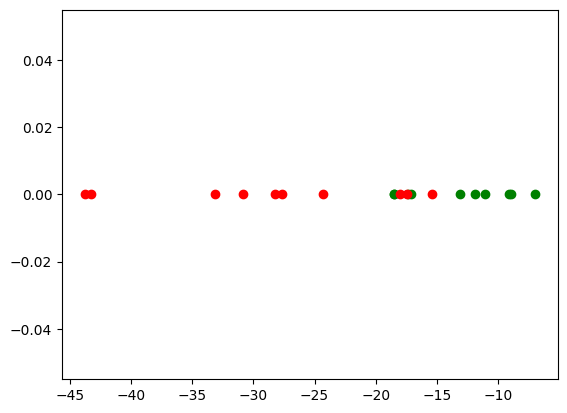

In [32]:
poze = os.listdir("Mici")
print(poze)

lista_haar = []

for poza in poze:
    #citeste imagine si transforma in gray
    im=io.imread("Mici/"+poza)
    im = color.rgb2gray(im)
    #calculeaza imaginea integrala pt fiecare poza
    ii=integral_image(im)

    #calculeaza 2 variuante de trasaturi haar 
    zn1,zn2,za1,haar3=haar_trei(0,0,6,24,ii)
    zn1,za1,haar2=haar_doi(0,6,12,12,ii)
    
    #adauga in lista valoarea trasaturii pt fiec poza
    lista_haar.append(haar3)

print(lista_haar)

#transforma lista de valori Haar in array       
lista_haar_2=np.asarray(lista_haar)
print(lista_haar_2)

# creeaza a doua axa pentru figura
y = np.zeros(20)
# y[11:20] = 1

#ploteaza intr-o figura valorile haar pt fete cu verde si non-fete cu rosu
plt.figure() 
plt.scatter(lista_haar_2[0:10], y[0:10], color='g')
plt.scatter(lista_haar_2[10:20], y[10:20], color='r')

#alegeti pragul aastfel incat Tp max FP min
#folositi sintaxa m[conditie]=
T= -20
ref = y
ref[0:10] = 1
pred_haar = (lista_haar_2 > T)

#apelati fct de performanta 
performanta(pred_haar, ref)
